In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

#Get data

In [1]:
!pip install pyvi --quiet

In [ ]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from pyvi import ViTokenizer, ViPosTagger
from tqdm import tqdm
import numpy as np
import gensim
import numpy as np
import os
import pickle

In [ ]:
def get_data(folder):
    sentences = []
    for path in os.listdir(folder):
        file_path = os.path.join(folder, path)
        with open(file_path, 'r', encoding="utf-16") as f:

            lines = f.readlines()

            for line in lines:
                sens = line.split('.')
                for sen in sens:
                    if len(sen) > 10:
                        sen = gensim.utils.simple_preprocess(sen)
                        sen = ' '.join(sen)
                        sen = ViTokenizer.tokenize(sen)
                        sentences.append(sen)

    return sentences

In [ ]:
# !wget https://raw.githubusercontent.com/duyvuleo/VNTC/master/Data/10Topics/Ver1.1/Test_Full.rar
# !wget https://raw.githubusercontent.com/duyvuleo/VNTC/master/Data/10Topics/Ver1.1/Train_Full.rar
# !wget https://raw.githubusercontent.com/duyvuleo/VNTC/master/Data/27Topics/Ver1.1/Test.rar
# !wget https://raw.githubusercontent.com/duyvuleo/VNTC/master/Data/27Topics/Ver1.1/Train.rar

In [ ]:
!sudo apt-get install unrar

In [ ]:
# !unrar x "/content/Test.rar" '/content/drive/MyDrive/final-project-seminar/data/data'
# !unrar x "/content/Train.rar" '/content/drive/MyDrive/final-project-seminar/data/data'
# !unrar x "/content/Test_Full.rar" '/content/drive/MyDrive/final-project-seminar/data/data'
# !unrar x "/content/Train_Full.rar" '/content/drive/MyDrive/final-project-seminar/data/data'

In [ ]:
from multiprocessing import Pool
sentences = []
train_paths = ['/content/drive/MyDrive/final-project-seminar/data/data/Test_Full',
               '/content/drive/MyDrive/final-project-seminar/data/data/Train_Full',
               '/content/drive/MyDrive/final-project-seminar/data/data/test',
               '/content/drive/MyDrive/final-project-seminar/data/data/train']

dirs = []
for path in train_paths:
    for p in os.listdir(path):
        dirs.append(os.path.join(path, p))

# print(len(dirs))
# print(dirs)

for d in tqdm(dirs):
    sens = get_data(d)
    sentences = sentences + sens

100%|██████████| 74/74 [07:40<00:00,  6.22s/it]


In [ ]:
print(len(sentences))

1008315


In [ ]:
pickle.dump(sentences, open('/content/drive/MyDrive/final-project-seminar/colab/sentences.pkl', 'wb'))

#train_w2v

In [ ]:
import pickle
sentences = pickle.load(open('/content/drive/MyDrive/final-project-seminar/colab/sentences.pkl', 'rb'))

In [ ]:
from gensim.models import Word2Vec

In [ ]:
print(len(sentences))

1008315


In [ ]:
input_gensim = []
for sen in sentences:
    input_gensim.append(sen.split())

In [ ]:
# !pip install --upgrade gensim

In [ ]:
# model = Word2Vec(input_gensim, vector_size=128, window=5, min_count=0, workers=4, sg=1)
# model.wv.save("/content/w2v.model")

In [ ]:
import gensim.models.keyedvectors as word2vec
w2v_model = word2vec.KeyedVectors.load('/content/w2v.model')

vocabulary = []
for word in w2v_model.key_to_index.keys():
    vocabulary.append(word)
print(len(vocabulary))

111120


In [ ]:
keys = ['đẹp', 'xấu']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(w2v_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [ ]:
# for word in keys:
#     embeddings = []
#     words = []
#     embeddings.append(w2v_model[word])
#     words.append(word)

#     embedding_clusters.append(embeddings)
#     word_clusters.append(words)

# print(word_clusters)

[['tuyệt', 'đẹp_mắt', 'santo', 'tuyệt_hảo', 'mẫu_mực', 'ngộ_nghĩnh', 'lý_thú', 'sống_động', 'địa_thế', 'nhào_lộn', 'sinh_động', 'lộng_lẫy', 'mê_hồn', 'độc_đáo', 'bắt_mắt', 'trang_hoàng', 'dáng_vẻ', 'khung_cảnh', 'solo', 'mềm_mại', 'thanh_lịch', 'đặc_sắc', 'thuần_khiết', 'hào_hoa', 'mảnh_mai', 'vô_lê', 'vui_nhộn', 'hình_thể', 'đĩnh_đạc', 'ronnie'], ['phương_hại', 'tổn_hại', 'ít_nhiều', 'nghiêm_trọng', 'hình_sự_hóa', 'phiền_phức', 'méo_mó', 'nguy_hại', 'khôn_lường', 'hội_chứng', 'thua_thiệt', 'phản_tác_dụng', 'bắc_cầu', 'xuống_cấp', 'đình_đốn', 'ảnh_hưởng', 'mỹ_tục', 'hủy_hoại', 'ghê_gớm', 'lỗ_lãi', 'hệ_lụy', 'kích_động', 'vấn_nạn', 'gây_rối', 'thuần_phong', 'bất_trắc', 'đào_thải', 'trì_trệ', 'phi_pháp', 'đụng_chạm'], ['đẹp'], ['xấu']]


In [ ]:
import numpy as np
embedding_clusters = np.array(embedding_clusters)
embedding_clusters.shape

(2, 30, 128)

(2, 30, 128)


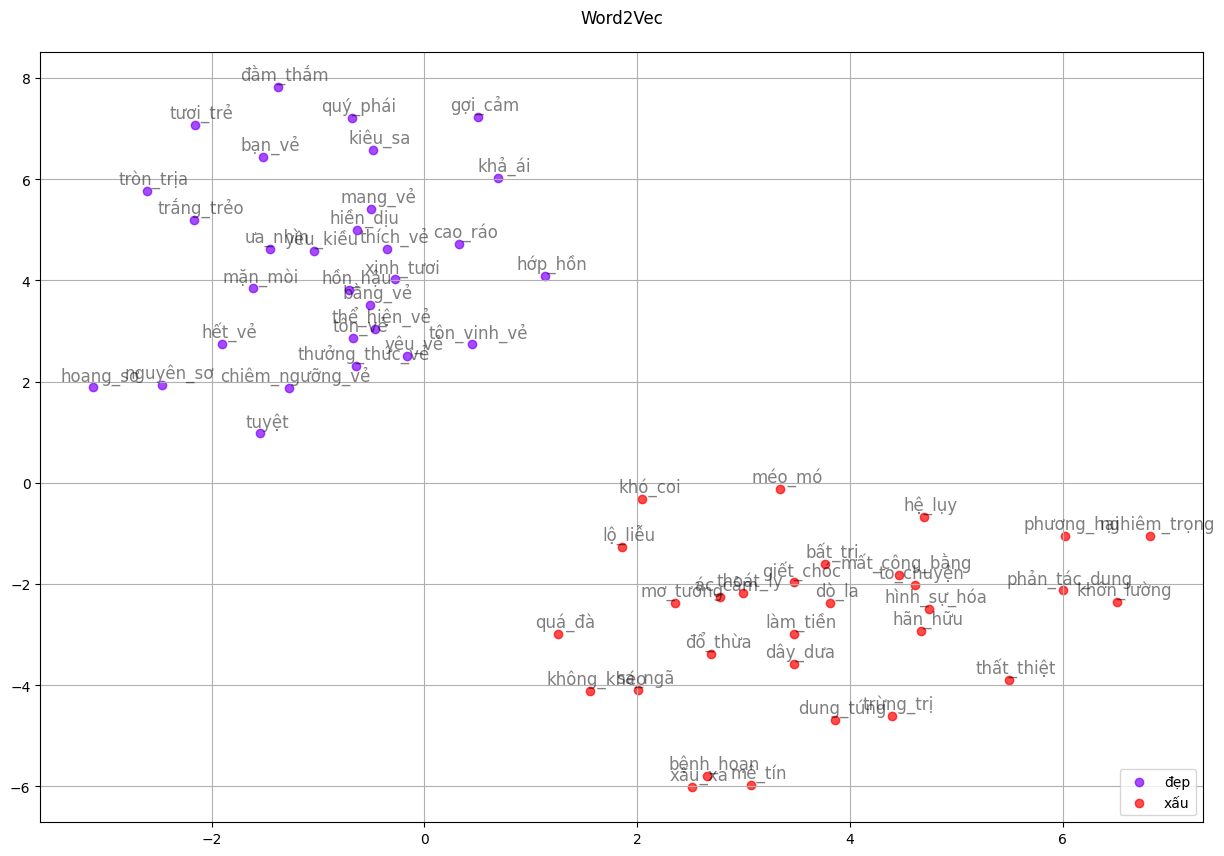

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
print(embedding_clusters.shape)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


import matplotlib.pyplot as plt
import matplotlib.cm as cm
# % matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(15, 10))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=np.array([color,]), alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='center', va='bottom', size=12)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Word2Vec\n', keys, embeddings_en_2d, word_clusters, 0.7,
                        'output.png')